# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('adult_with_headers.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [51]:
num_col= [i for i in df.columns if df[i].dtype!='O']
print(num_col)
cat_col= [i for i in df.columns if df[i].dtype == 'O']
cat_col

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

## Apply normalization and standardization for numerical features

In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [19]:
std=StandardScaler()

In [20]:
std_num_col=std.fit_transform(df[num_col])
std_num_col

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

In [21]:
min_max=MinMaxScaler()

In [26]:
df[num_col]=min_max.fit_transform(df[num_col])
df[num_col]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [28]:
df_new=pd.concat([df,df],axis=1)

In [30]:
df_new

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,...,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,...,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,...,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,...,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K



## Scaling Type:

### MinMaxScaler: Scales data to a specific range (usually [0, 1]).

### StandardScaler: Scales data to have a mean of 0 and a standard deviation of 1.

##  Effect on Data Distribution:

### MinMaxScaler: Preserves the original distribution but rescales the range.

### StandardScaler: Changes the distribution to a standard normal distribution.

## Sensitivity to Outliers:

### MinMaxScaler: Sensitive to outliers because it uses the minimum and maximum values for scaling.

### StandardScaler: Less sensitive to outliers as it uses mean and standard deviation.

## Use Cases:

### MinMaxScaler: Best when you need a fixed range or when working with algorithms that assume data is bounded within a specific range.

### StandardScaler: Best when features need to be normalized to zero mean and unit variance or when algorithms assume normally distributed data

In [33]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [ ]:

data = pd.get_dummies(df,columns =['race','sex','income'] )
data

In [93]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

# Apply LabelEncoder to each categorical column
encoded_data = df.copy()  # Make a copy of the original data to avoid modifying it

for column in df.columns:
    encoded_data[column] = lb.fit_transform(df[column])

print("Encoded DataFrame:")
#print(encoded_data)
data1 = pd.DataFrame(encoded_data)
data1

Encoded DataFrame:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,22,7,2671,9,12,4,1,1,25,0,...,39,0,0,0,0,1,0,1,1,0
1,33,6,2926,9,12,2,4,0,0,0,...,39,0,0,0,0,1,0,1,1,0
2,21,4,14086,11,8,0,6,1,0,0,...,39,0,0,0,0,1,0,1,1,0
3,36,4,15336,1,6,2,6,0,0,0,...,39,0,0,1,0,0,0,1,1,0
4,11,4,19355,9,12,2,10,5,0,0,...,5,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,0,0,...,39,0,0,0,0,1,1,0,1,0
32557,23,4,8080,11,8,2,7,0,0,0,...,39,0,0,0,0,1,0,1,0,1
32558,41,4,7883,11,8,6,1,4,0,0,...,39,0,0,0,0,1,1,0,1,0
32559,5,4,12881,11,8,4,1,3,0,0,...,39,0,0,0,0,1,0,1,1,0


In [95]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       32561 non-null  int64
 1   workclass                 32561 non-null  int32
 2   fnlwgt                    32561 non-null  int64
 3   education                 32561 non-null  int32
 4   education_num             32561 non-null  int64
 5   marital_status            32561 non-null  int32
 6   occupation                32561 non-null  int32
 7   relationship              32561 non-null  int32
 8   capital_gain              32561 non-null  int64
 9   capital_loss              32561 non-null  int64
 10  hours_per_week            32561 non-null  int64
 11  native_country            32561 non-null  int32
 12  race_ Amer-Indian-Eskimo  32561 non-null  int64
 13  race_ Asian-Pac-Islander  32561 non-null  int64
 14  race_ Black               32561 non-nu

## 3. Feature Engineering:

* Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

* Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

<Axes: xlabel='capital_gain', ylabel='capital_loss'>

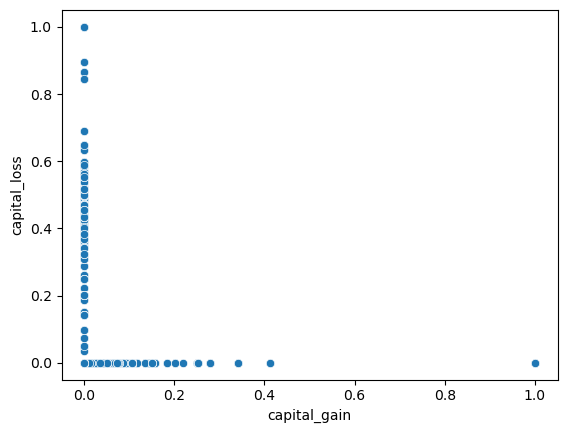

In [103]:
import seaborn as sns
sns.scatterplot(df , x = 'capital_gain' , y = 'capital_loss')

<Axes: xlabel='education', ylabel='education_num'>

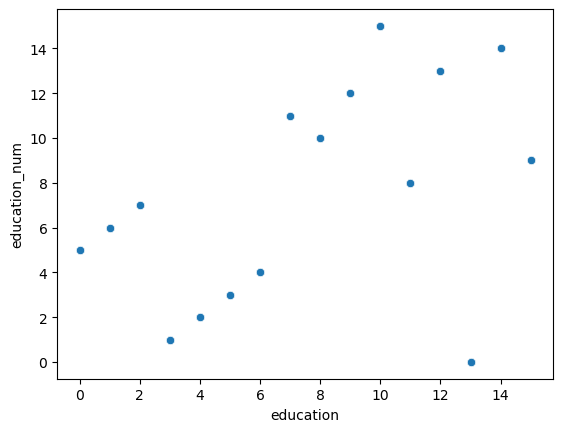

In [104]:
import seaborn as sns
sns.scatterplot(data1 , x = 'education' , y = 'education_num')

In [105]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,0.021740,0.0,...,United-States,False,False,False,False,True,False,True,True,False
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,0.000000,0.0,...,United-States,False,False,False,False,True,False,True,True,False
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,0.000000,0.0,...,United-States,False,False,False,False,True,False,True,True,False
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,0.000000,0.0,...,United-States,False,False,True,False,False,False,True,True,False
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,0.000000,0.0,...,Cuba,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,0.000000,0.0,...,United-States,False,False,False,False,True,True,False,True,False
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,0.000000,0.0,...,United-States,False,False,False,False,True,False,True,False,True
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,0.000000,0.0,...,United-States,False,False,False,False,True,True,False,True,False
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,0.000000,0.0,...,United-States,False,False,False,False,True,False,True,True,False


In [107]:
df['Total_Income'] = df['capital_gain'] - df['capital_loss']

In [111]:
df['Total_Income']

0        0.021740
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    0.150242
Name: Total_Income, Length: 32561, dtype: float64

In [113]:
df['Total_Income'].value_counts()

Total_Income
 0.000000    28330
 0.150242      347
 0.076881      284
 0.072981      246
-0.436639      202
             ...  
-0.423324        1
 0.011110        1
 0.025380        1
-0.571396        1
-0.323921        1
Name: count, Length: 210, dtype: int64

In [115]:
def categorize_education(education_num):
    if education_num <= 5:
        return 'elimentary School'
    elif education_num <= 10:
        return 'High School'
    elif education_num <= 12:
        return 'intermediate'
    elif education_num <= 16:
        return 'Bachelor Degree'
    else:
        return 'Graduate Degree'

# Apply categorization
data1['Education_Level'] = data1['education_num'].apply(categorize_education)


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'marital_status'}>],
       [<Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>,
        <Axes: title={'center': 'capital_gain'}>],
       [<Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_per_week'}>, <Axes: >]],
      dtype=object)

<Figure size 1500x1500 with 0 Axes>

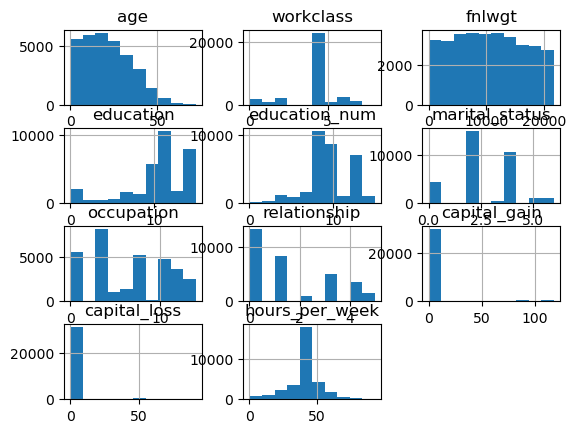

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
data1.iloc[:,:11].hist()


In [120]:
import numpy as np
data1['log_occupation'] = np.log(data1['occupation'])

C:\Users\vacch\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


data1

In [123]:
from sklearn.ensemble import IsolationForest
import numpy as np

In [125]:
#X = data1.drop('Education_Level', axis = 1)
X = data1.iloc[:,:-5]
# Initialize the Isolation Forest
iso_forest = IsolationForest(contamination=0.2)  # 'contamination' is the expected proportion of outliers

# Fit the model
iso_forest.fit(X)

IsolationForest(contamination=0.2)

In [127]:
#predicting anomolies
y_pred = iso_forest.predict(X)
y_pred

array([ 1,  1,  1, ...,  1,  1, -1])

In [129]:
#removing anomolies
x_no_outliers = X[y_pred == 1]
x_no_outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female
0,22,7,2671,9,12,4,1,1,25,0,39,39,0,0,0,0,1,0
1,33,6,2926,9,12,2,4,0,0,0,12,39,0,0,0,0,1,0
2,21,4,14086,11,8,0,6,1,0,0,39,39,0,0,0,0,1,0
5,20,4,17700,12,13,2,4,5,0,0,39,39,0,0,0,0,1,1
7,35,6,13620,11,8,2,4,0,0,0,44,39,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,5,4,18560,15,9,4,11,1,0,0,39,39,0,0,0,0,1,0
32556,10,4,16528,7,11,2,13,5,0,0,37,39,0,0,0,0,1,1
32557,23,4,8080,11,8,2,7,0,0,0,39,39,0,0,0,0,1,0
32558,41,4,7883,11,8,6,1,4,0,0,39,39,0,0,0,0,1,1


In [131]:
#removing anomolies
x_no_outliers = X[y_pred == 1]
x_no_outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female
0,22,7,2671,9,12,4,1,1,25,0,39,39,0,0,0,0,1,0
1,33,6,2926,9,12,2,4,0,0,0,12,39,0,0,0,0,1,0
2,21,4,14086,11,8,0,6,1,0,0,39,39,0,0,0,0,1,0
5,20,4,17700,12,13,2,4,5,0,0,39,39,0,0,0,0,1,1
7,35,6,13620,11,8,2,4,0,0,0,44,39,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,5,4,18560,15,9,4,11,1,0,0,39,39,0,0,0,0,1,0
32556,10,4,16528,7,11,2,13,5,0,0,37,39,0,0,0,0,1,1
32557,23,4,8080,11,8,2,7,0,0,0,39,39,0,0,0,0,1,0
32558,41,4,7883,11,8,6,1,4,0,0,39,39,0,0,0,0,1,1


# PPS

In [ ]:
!pip install ppscore

In [ ]:
import ppscore as pps
import pandas as pd

In [ ]:
pps_matrix = pps.matrix(x_no_outliers)
print(pps_matrix)